### Consigna 1

# Demostración

Queremos demostrar que, si $(I - A)^{-1} = I + A + A^2 + \dots + A^n$, entonces:
$$
\lim_{n \to \infty} A^{n+1} = 0.
$$


Tomemos $$ S_N = I + A + A^2 + \dots + A^N $$
Luego $$ S_N(I - A) = (I + A + A^2 + \dots + A^N)(I-A)$$
$$S_N(I - A) = I - A + A - A^2 +   \dots - A^N + A^N - A^{N+1}$$
$$ S_N(I - A) = I - A^{N+1}$$

Ahora, si tomamos: $$N \to \infty$$ por enunciado sabemos que $$ S_N \to (I - A)^{-1} $$

Entonces:
$$\lim_{n \to \infty} S_N(I-A) = (I-A)^{-1} (I-A) = I $$

Y por lo tanto, dado que: $$ S_N(I - A) = I - A^{N+1}$$
$$\Rightarrow \lim_{n \to \infty} A^{N+1} = 0 $$


### Consigna 2

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import norm

In [53]:
A1 = np.array([
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.303, 0.256, 0.323, 0.225, 0.257]
])

A2 = np.array([
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.003, 0.256, 0.323, 0.225, 0.257]
])

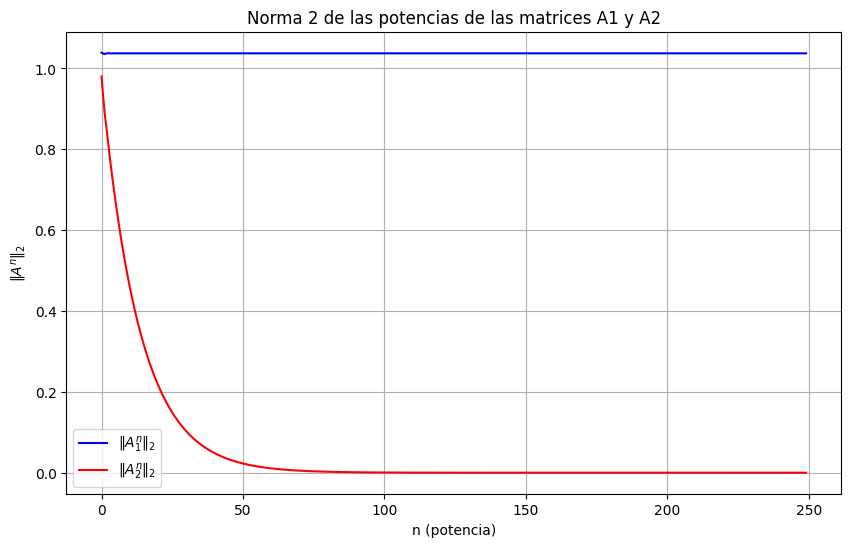

In [54]:

N = 250

a1 = []
a2 = []

for i in range(1, N+1):
    a1.append(norm(np.linalg.matrix_power(A1, i), 2))
    a2.append(norm(np.linalg.matrix_power(A2, i), 2))

plt.figure(figsize=(10, 6))
plt.plot(a1, label=r'$\|A_1^n\|_2$', color='blue')
plt.plot(a2, label=r'$\|A_2^n\|_2$', color='red')
plt.xlabel('n (potencia)')
plt.ylabel(r'$\|A^n\|_2$')
plt.title('Norma 2 de las potencias de las matrices A1 y A2')
plt.legend()
plt.grid(True)
plt.show()


### Consigna 3

In [55]:
#from funciones import metodoPotencia

def metodoPotencia(A, num_iteraciones):
    tolerancia = 1e-6
    autovalores = []
    n = A.shape[0]
    x0 = np.random.rand(n)
    x0 = x0 / np.linalg.norm(x0)

    for _ in range(num_iteraciones):
        x1 = A @ x0
        x1 = x1 / np.linalg.norm(x1)

        autovalor = (x0.T @ A @ x0) / (x0.T @ x0) 
        autovalores.append(autovalor)
        if np.linalg.norm(x1 - x0) < tolerancia:
            break
        x0 = x1

    promedio = np.mean(autovalores)
    desviacion_estandar = np.std(autovalores)
    maxaval = max(autovalores)

    return promedio, desviacion_estandar, maxaval, autovalores

p1,d1,a1,v1 = metodoPotencia(A1,250)
print ("El autovalor mas grande de A1 es: " + str(a1))

p2,d2,a2,v2 = metodoPotencia(A2,250)
print ("El autovalor mas grande de A2 es: " + str(a2))

El autovalor mas grande de A1 es: 0.9999999619481965
El autovalor mas grande de A2 es: 0.9381846208967775


In [56]:
import pandas as pd

data = {
    'Matriz': ['A1', 'A2'],
    'Promedio Autovalores': [p1, p2],
    'Desviación Estándar': [d1, d2]
}

tabla = pd.DataFrame(data)

print(tabla)

  Matriz  Promedio Autovalores  Desviación Estándar
0     A1               0.98692             0.035498
1     A2               0.91922             0.024071


### Consigna 4

Grafiquemos la serie de potencias $ (I - A)^{-1} $ de  A1 y  A2 para $ n = 10 $ y  $ n = 100 $. Agregamos tambien un punto con $ n = 300 $ para ver mejor la tendencia de las normas





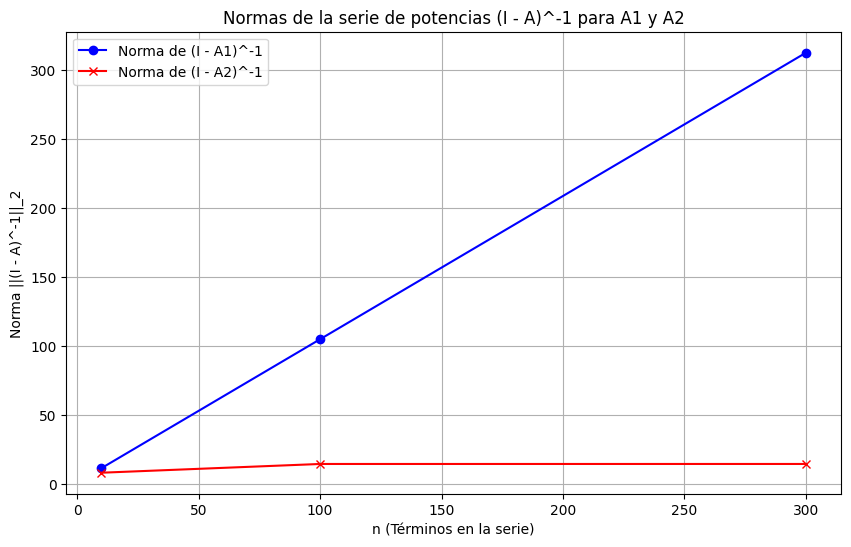

In [57]:
n_values = [10, 100 , 300]

norms_A1 = []
norms_A2 = []

for n in n_values:

    sum_A1 = np.eye(A1.shape[0])  
    sum_A2 = np.eye(A2.shape[0])  
    
    for k in range(1, n+1):
        sum_A1 += np.linalg.matrix_power(A1, k)
        sum_A2 += np.linalg.matrix_power(A2, k)
    
    norms_A1.append(norm(sum_A1, 2))
    norms_A2.append(norm(sum_A2, 2))


plt.figure(figsize=(10, 6))

plt.plot(n_values, norms_A1, label='Norma de (I - A1)^-1', marker='o', linestyle='-', color='b')
plt.plot(n_values, norms_A2, label='Norma de (I - A2)^-1', marker='x', linestyle='-', color='r')

plt.xlabel('n (Términos en la serie)')
plt.ylabel('Norma ||(I - A)^-1||_2')
plt.title('Normas de la serie de potencias (I - A)^-1 para A1 y A2')
plt.legend()
plt.grid(True)
plt.show()

Notemos que hay convergencia solo para la matriz A2. La serie de potencias converge si el radio espectral de la matriz A (es decir, el mayor valor absoluto de sus autovalores) es menor que 1. Esto está relacionado con la idea de que, para matrices con autovalores de módulo menor a 1, las potencias de la matriz tienden a reducirse y la serie suma un número finito de términos (esto se debe a que las potencias sucesivas de A tienden a 0 cuando los autovalores tienen módulo menor a 1).
para nuestro ejemplo, recordemos que el autovalor de A1 era igual a 1.0000000895350079 y el de A2 era menor, exactamente 0.9276516098096924.

Veamos ahora los errores

In [58]:
from funciones import calcularLU, inversaLU

def error(A, n):
    suma_parcial = np.eye(A.shape[0])
    errores = []

    for i in range(1, n):
        suma_parcial += np.linalg.matrix_power(A, i) 
        I = np.eye(A.shape[0])
        
        L, U, P = calcularLU(I - A)
        inv = inversaLU(L, U, P)
        
        norma = np.linalg.norm(suma_parcial - inv)
        errores.append(norma)  

    return errores

error_A1 = error(A1, 100)
error_A2 = error(A2, 100)
print( "error_A1:" , error_A1)
print("error_A2: " ,error_A2)


error_A1: [2.252959075729415e+16, 2.2529590757294156e+16, 2.2529590757294156e+16, 2.2529590757294156e+16, 2.252959075729416e+16, 2.252959075729416e+16, 2.252959075729416e+16, 2.2529590757294164e+16, 2.2529590757294164e+16, 2.2529590757294164e+16, 2.252959075729417e+16, 2.252959075729417e+16, 2.252959075729417e+16, 2.252959075729417e+16, 2.252959075729417e+16, 2.252959075729417e+16, 2.2529590757294172e+16, 2.2529590757294172e+16, 2.2529590757294176e+16, 2.2529590757294176e+16, 2.2529590757294176e+16, 2.2529590757294176e+16, 2.2529590757294176e+16, 2.252959075729418e+16, 2.252959075729418e+16, 2.252959075729418e+16, 2.2529590757294184e+16, 2.2529590757294184e+16, 2.2529590757294184e+16, 2.2529590757294184e+16, 2.2529590757294184e+16, 2.2529590757294188e+16, 2.2529590757294188e+16, 2.2529590757294188e+16, 2.252959075729419e+16, 2.252959075729419e+16, 2.252959075729419e+16, 2.252959075729419e+16, 2.2529590757294196e+16, 2.2529590757294196e+16, 2.2529590757294196e+16, 2.25295907572942e+16, 

Notemos que el error en error_A1 se mantiene constante, sin embargo en error_A2 va decayendo mientras aumenta la sucecion de potencias.

Veamos un grafico:

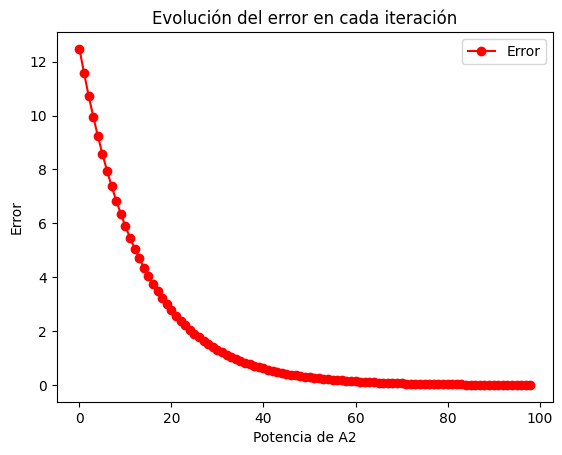

In [59]:
x = range(len(error_A2))
    

plt.plot(x, error_A2, marker='o', linestyle='-', color='r', label='Error')
    

plt.xlabel('Potencia de A2')
plt.ylabel('Error')
plt.title('Evolución del error en cada iteración')
plt.legend()
    

plt.show()

Notamos que efectivamente el error decae mientras mas aumenta la sucesión de potencias. Es mas, este converge a cero, lo que nos dice que mientras a mayor sea la sucesión de potencias, $ (I-A)^{-1} $ converge a esta.

### Consigna 5

In [ ]:
#### CODIGO PARA GENERAR MI MATRIZ ANN ####

#df = pd.read_csv('/home/Estudiante/Downloads/matrizlatina2011_compressed_0.csv')  
#PER = df[df['Country_iso3'] == 'PER']    
#Nic = df[df['Country_iso3'] == 'NIC']
# Generar submatrices Z
Zpn = PER.filter(like='NIC').drop(["CONS_NIC", "GFCF_NIC"], axis=1).values
Zpp = PER.filter(like='PER').drop(["CONS_PER", "GFCF_PER"], axis=1).values
Znn = NIC.filter(like='NIC').drop(["CONS_NIC", "GFCF_NIC"], axis=1).values
Znp = NIC.filter(like='PER').drop(["CONS_PER", "GFCF_PER"], axis=1).values
# Función para evitar ceros en la producción
def ajustar(P):
    for i in range(len(P)):
        if P[i] == 0:
            P[i] = 1
    return P
# Ajustamos producciones
Pn = ajustar(Pn)
# Calculamos matrices inversas
PnInv = np.diag(1 / Pn)
# Construimos matriz A
Ann = Znn @ PnInv

In [60]:
import numpy as np
from funciones import metodoPotencia, calcularLU, inversaLU

pAnn,dAnn,avalmaxAnn, avalsAnn = metodoPotencia(Ann,50)
pApp,dApp,avalmaxApp, avalsApp = metodoPotencia(App,50)

print ("El autovalor mas grande de Ann es: " + str(avalmaxAnn))
print(avalsAnn)
print ("El autovalor mas grande de App es: " + str(avalmaxApp))
print(avalsApp)

El autovalor mas grande de Ann es: 0.2616204725512024
[0.22733259036565218, 0.2585864507619178, 0.25854211032439606, 0.2600364132043349, 0.26151353203036054, 0.2616204725512024, 0.26143362197064407, 0.2612290708756219, 0.26107021417365855, 0.2609563507218944, 0.2608765809301488, 0.26082104249926763, 0.26078249769034423, 0.26075580670143106, 0.2607373513769604, 0.2607246017952815, 0.2607157984394003, 0.26070972169902074, 0.2607055278195539, 0.26070263370829416, 0.2607006366653585, 0.26069925868175536, 0.2606983078750332, 0.2606976518260544, 0.26069719915925565, 0.26069688682413533, 0.2606966713160479, 0.2606965226173171, 0.26069642001621735, 0.2606963492219936, 0.26069630037423874]
El autovalor mas grande de App es: 0.39594926218175813
[0.2682622583682764, 0.39594926218175813, 0.3901515364517666, 0.39056428088149364, 0.38883518388446103, 0.38689154991447017, 0.385669416877331, 0.3850700515183013, 0.38481874902664953, 0.3847296323168775, 0.3847066174748248, 0.38470705164347735, 0.3847137

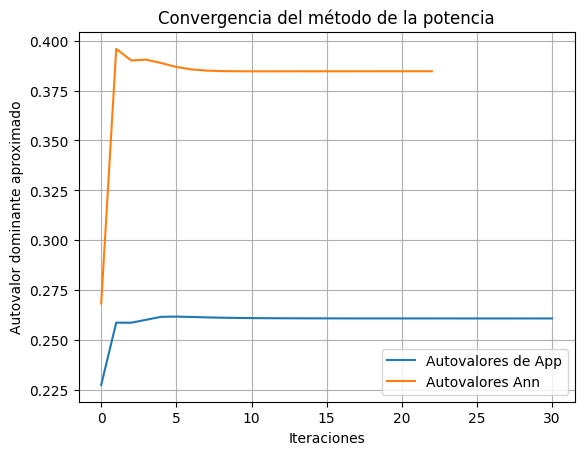

In [61]:
plt.plot(avalsAnn, label='Autovalores de App')
plt.plot(avalsApp, label='Autovalores Ann')
plt.xlabel('Iteraciones')
plt.ylabel('Autovalor dominante aproximado')
plt.title('Convergencia del método de la potencia')
plt.legend()
plt.grid(True)
plt.show()

Como podemos ver a partir del grafico, sí existe convergencia de las matrices App y Ann, esto pues el autovalor mas grande (en modulo) es menor a 1 en ambas matrices y para cualquier exponente n puesto que a partir de cierto punto estos comienzan a estabilizarse. 

### Consigna 6

a) Vamos a probar que para cualquier vector $z \in \mathbb{R}^n$ sucede que el promedio de las componentes de $E_nz$ es 0. 

Sabiendo que $E_n \in \mathbb{R}^{n \times n}$ se escribe como $ E_n = I_n - \frac{1}{n}ee^t $  podemos decir que:
$$ E_nz = (I_n - \frac{1}{n}ee^t)z = z - \frac{1}{n}ee^tz \quad ,luego\,\, usando\, \, e = \begin{pmatrix} 1 \\\vdots \\ 1 \end{pmatrix}  \,\, puedo \,\,escribir\,\, que\,\, e^tz= \sum_{i=1}^{n} z_i$$
$$ reemplazando\,\, obtenemos\,\, E_n = z -\frac{1}{n}\left( \sum_{i=1}^{n} z_i \right) e$$
$$ Sabiendo \,\,que \,\,el\,\, promedio\,\, de\,\, las\,\, componentes\,\, se \,\,escribe\,\, como\,\, \frac{1}{n} \sum_{i=1 }^{n}z_i \,\, luego: $$

$$ \frac{1}{n} \sum_{i=1}^{n} z_i = \frac{1}{n} \sum_{i=1}^{n} \left( z_i - \frac{1}{n} \sum_{j=1}^{n} z_j \right) = \frac{1}{n} \sum_{i=1}^{n} z_i - \frac{1}{n} \sum_{j=1}^{n} z_j = 0$$
b) Para este ejercicio primero buscamos expresar la matriz de la transformacion lineal $E_n$ en la base $ \{e,d_2,..., d_n\}$ luego podremos calcular los autovalores, autovectores y determinar la imagen y nucleo de dicha matriz.
$$ \bullet caso \,\, E_ne $$
$$\quad E_ne =\left(I_n - \frac{1}{n}ee^t \right)e = e - \frac{1}{n}e\left(e^te\right) = e - \frac{1}{n}en = 0$$
$$E_n = 0 \,\,podemos \,\,interpretarlo\,\, como \,\, Av = \lambda  \,\, con \,\,v = e\,\, y \,\, \lambda = 0 $$
$$\bullet caso \,\, E_nd $$
$$ Sabemos\,\, que\,\, d \in \{d_2,...,d_n \}\,\, y \,\,como\,\, estos\,\, vectores\,\, son\,\, ortogonales \,\,a\,\, e\,\, luego\,\, e^td_i =0$$
$$ E_nd= \left(I_n - \frac{1}{n}ee^t \right)d = d - \frac{1}{n}e\left(e^td\right)= d$$
$$ Entonces \,\,E_nd = 1d \quad \Rightarrow \quad d \,\,es \,\,autovector\,\, de\,\, \lambda = 1$$
Ahora para encontrar el nucleo y la imagen de esta matriz es cuestion de poner los transformados de los elementos de la base $b=\{ d_2,...d_n\}$ como columnas

$$ E_n = Abb =
\begin{bmatrix}
0 & 0 & 0 & \cdots & 0 \\
0 & 1 & 0 & \cdots & 0 \\
0 & 0 & 1 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & 1
\end{bmatrix} $$
Con esta matriz obtenemos los subespacios buscados:
$$ \bullet  Nucleo: el \,\,unico \,\,vector\,\, que\,\, manda \,\,otros\,\, al \,\, 0 \,\, es \,\,e\,\,$$
$$ Vemos \,\ que \,\ Nu\left( E_n \right) = \langle e \rangle \,\ luego \,\ dim \left( Nu\left(E_n\right) \right) = 1$$
$$ \bullet Im \left( E_n\right) = \langle d_2, ... ,d_n \rangle \,\, entonces\,\,  dim \left( Im\left(E_n\right) \right) = n - 1  $$

c) Sabemos que un proyector se dice ortogonal si y solo si $Nu\left(A \right) \bot Im\left( A \right)  \\ $

Anteriormente  pudimos observar que es cierto que $ \langle d_2, ... , d_n\rangle $ es ortogonal a  $\langle e\rangle$, sabemos que $Im\left( A \right) = \langle d_2, ... , d_n\rangle$ y $Nu\left(A \right) = \langle e \rangle   $ luego $Nu\left(A \right) \bot Im\left( A \right)  \\ $

Dicho proyector proyecta sobre el subespacio generado por $ \langle d_2, ... , d_n\rangle $

d)

$ \bullet $ Es FALSO que  E_n es una matriz  ortogonal: quiero   ver  que  $E_n^tE_n = I \,\,luego $
$$ \left( I_n - \frac{1}{n}ee^t \right)^t \left( I_n -\frac{1}{n}ee^t \right) = \left( I_n- \frac{1}{n}e^te \right) \left( I_n- \frac{1}{n}ee^t\right) = I_n -\frac{2}{n}e^te + \frac{1}{n^2}nee^t = I_n - \frac{1}{n}ee^t \neq I$$

$ \bullet $  Es VERDADERO que $E_n$ es una matriz singular pues tiene columnas de ceros y tambien sabemos que $det\left( E_n\right) = det \left( 0d_2...d_n \right) = 0 $

$ \bullet $ Es FALSO que $E_n$ es definida positiva pues dicha matriz no es inversible ya que $det\left( E_n\right) = 0 $

$ \bullet $ Es VERDADERO que $tr\left(E_n\right) = n - 1:$

$$sabemos\,\,  que \,\,  E_n =  
\begin{bmatrix}
0 & 0 & 0 & \cdots & 0 \\
0 & 1 & 0 & \cdots & 0 \\
0 & 0 & 1 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & 1
\end{bmatrix} \quad \Rightarrow tr\left(E_n\right) = n-1 $$
</p>



### Consigna 7

In [62]:
# from funciones import metodoPotenciaRecursivo

def metodoPotenciaRecursivo(C, k, epsilon=1e-6, autovalores=None, autovectores=None):
    if autovalores is None:
        autovalores = []
    if autovectores is None:
        autovectores = []
    # Caso base
    if len(autovalores) == k:
        return autovalores, autovectores

    # Generamos un vector aleatorio normalizado
    n = C.shape[0]
    x = np.random.rand(n)
    x = x / np.linalg.norm(x)

    # Iteramos
    x_next = C @ x
    x_next = x_next / np.linalg.norm(x_next)

    while np.linalg.norm(x_next - x) >= (1 - epsilon):
        x = x_next
        x_next = C @ x
        x_next = x_next / np.linalg.norm(x_next)

    # Calculamos el autovalor usando el cociente de Rayleigh y lo guardamos con el autovector aproximado
    autovalor = (x.T @ C @ x) / (x.T @ x)
    autovalores.append(autovalor)
    autovectores.append(x)  # Aquí se guarda el autovector correspondiente

    # Construimos la nueva matriz C' = C - autovalor * x * x^T
    Cprima = C - autovalor * np.outer(x, x)

    return metodoPotenciaRecursivo(Cprima, k, epsilon, autovalores, autovectores)

In [63]:
#Armamos nuestra matriz de covarianzas C del paıs Peru

In = np.eye(40)
e = np.ones((40, 1))
eeT = np.outer(e, e)
En = In - (1 / 40) * eeT

AppC = En@App
C = (np.transpose(AppC)@AppC)/(40 - 1)

autovalores, autovectores = metodoPotenciaRecursivo(C, k=2)
for i in range(len(autovalores)):
    print(f"Autovector {i+1}: {autovectores[i].flatten()}")
    print(f"Autovalor {i+1}: {autovalores[i]}")



Autovector 1: [0.06138295 0.19291483 0.19924465 0.23517787 0.06286183 0.22741382
 0.06378632 0.17351434 0.15019919 0.00511124 0.09309598 0.17707206
 0.23641159 0.24716505 0.00076828 0.09868971 0.16668731 0.09188266
 0.20810731 0.17104113 0.04904025 0.20436858 0.08696279 0.21334038
 0.22827594 0.19040231 0.19248713 0.12919844 0.12890579 0.11878846
 0.18584787 0.01607681 0.01713643 0.19480598 0.13377238 0.1594916
 0.21287673 0.00716235 0.01467684 0.20977673]
Autovalor 1: 0.005162081410820431
Autovector 2: [0.2534033  0.11164724 0.03908043 0.11485195 0.28559052 0.24437208
 0.28099195 0.16830465 0.12346152 0.18901548 0.17289305 0.03007312
 0.27108438 0.03653337 0.00034315 0.01241703 0.14659613 0.07536936
 0.0508773  0.26541928 0.18664381 0.05047332 0.21715972 0.06009492
 0.10466745 0.11468022 0.04549275 0.03840144 0.13182096 0.08780347
 0.16383819 0.13910847 0.1620525  0.02512498 0.22867777 0.0915967
 0.1961675  0.01704864 0.18402688 0.23620672]
Autovalor 2: 0.004232400709613141


### Consigna 8

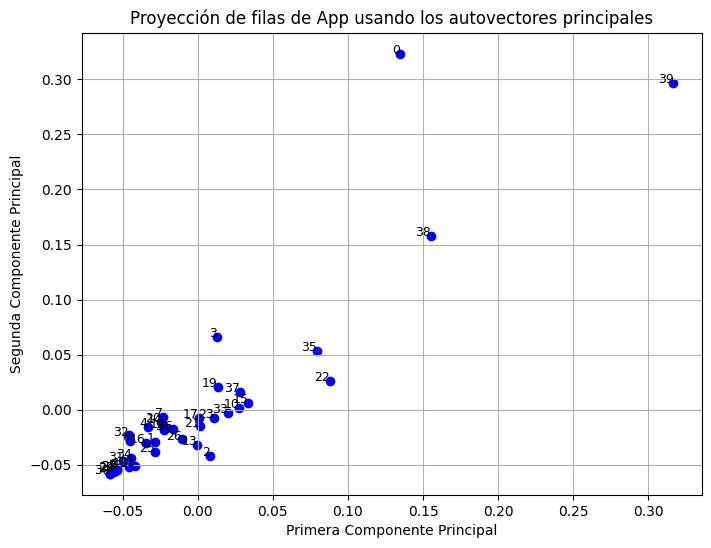

In [64]:
# from funciones import GraficoProyeccion
## PAIS 1: PERU
def GraficoProyeccion(proyeccion, nombre: str, color):
    plt.figure(figsize=(8, 6))
    plt.scatter(proyeccion[:, 0], proyeccion[:, 1], color=color, marker='o')
    plt.title(f"Proyección de filas de {nombre} usando los autovectores principales")
    for i in range(proyeccion.shape[0]):
        plt.text(proyeccion[i, 0], proyeccion[i, 1], str(i), fontsize=9, ha='right')
    plt.xlabel("Primera Componente Principal")
    plt.ylabel("Segunda Componente Principal")
    plt.grid()
    plt.show()

subespacio = np.array(autovectores).T
proyeccion = AppC @ np.array(autovectores).T
GraficoProyeccion(proyeccion,"App","blue")


Visualmente podriamos identificar 2 clusters: uno que contenga los puntos como el 5, 3, 21, 10, 22 y otro que contenga las proyecciones mas alejadas como el punto 38 y 39. Para entender por que dichas proyecciones estan mas alejadas de las otras se podria ver para cada sector numerado (cada punto etiquetado coincide con su numero de fila en la matriz de covarianzas) que ocurre con la produccion final y ver por que el algoritmo PCA me agrupa los puntos de esa manera.

### Consigna 9 -

Para una matriz cuadrada A cuyo mayor autovalor asociado tiene valor absoluto menor que 1, se cumple que:
$$ (I −A)^{−1} = I + A + A^2 + A^3 + ... + A^n+ ... $$
Como vimos anteriormente, esta condicion siempre se cumple en las matrices $ A $ de insumo-producto. Para estas matrices, la sucesion suma de potencias representa:

- $ A^1 $ La matriz insumo-producto sin modificaciones: Los insumos usados directamente para producir otros

- $ A^2 $ El insumo necesario para producir los insumos que se usan en el item anterior, O sea, los insumos indirectos de orden 2

- $ A^n $ Insumos indirectos de orden $ n $, o sea, los necesarios luego de $ n $ etapas en la cadena de producción

Podemos usar la ecuacion para reemplazarla en la definicion de la matriz input-output integrada verticalmente $ H $
$$ H = A (I − A)^{−1} $$
$$ H = A (I + A + A^2 + A^3 + ... + A^n+ ...) $$
$$ H = A + A^2 + A^3 + ... + A^n+ ... $$

Comparemosla con la matriz de Leontief $ L = (I −A)^{−1} $. Se puede reemplazar directamente la ecuacion tal que:
$$ L (I + A + A^2 + A^3 + ... + A^n+ ...) $$

Notamos que tanto $ L $ como $ H $ suman las sucesivas dependencias $ A^n $, pero en la Matriz integrada $ H $ no se le suma la identidad $ I $.

Esto señala que a $ H $ le falta una unidad de producción inicial, que en $ L $ se satisface directamente antes de las iteraciones adicionales de insumos.

Por eso representa unicamente la acumulacion de los efectos indirectos, y por eso se refuerzan las relaciones entre los sectores que tienen una alta relevancia en A

### Consigna 10 -

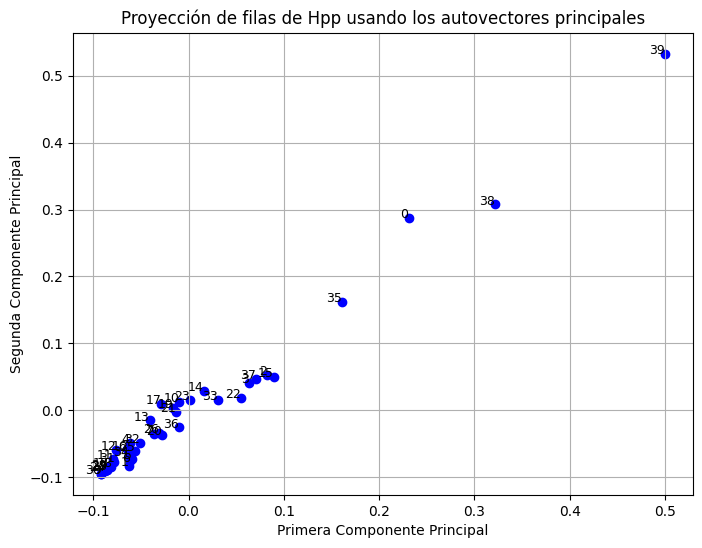

In [65]:
from funciones import calcularLU, inversaLU, metodoPotenciaRecursivo
import pandas as pd
import numpy as np

# Calculo Leontief de Peru
Ipp = np.eye(App.shape[0])
Lpp, Upp, Ppp = calcularLU(Ipp - App)  # LU de Leontief Perú
LeontiefInvpp = inversaLU(Lpp, Upp, Ppp)

# Calculo input-output integrada verticalmente H
Hpp = App@LeontiefInvpp

# Calculo matriz de covarianza, ahora para H
HppC = En@Hpp
C = (np.transpose(HppC)@HppC)/(40 - 1)
autovalores, autovectores = metodoPotenciaRecursivo(C, k=2)
subespacio = np.array(autovectores).T
proyeccion = HppC @ np.array(autovectores).T

GraficoProyeccion(proyeccion,"Hpp","blue")

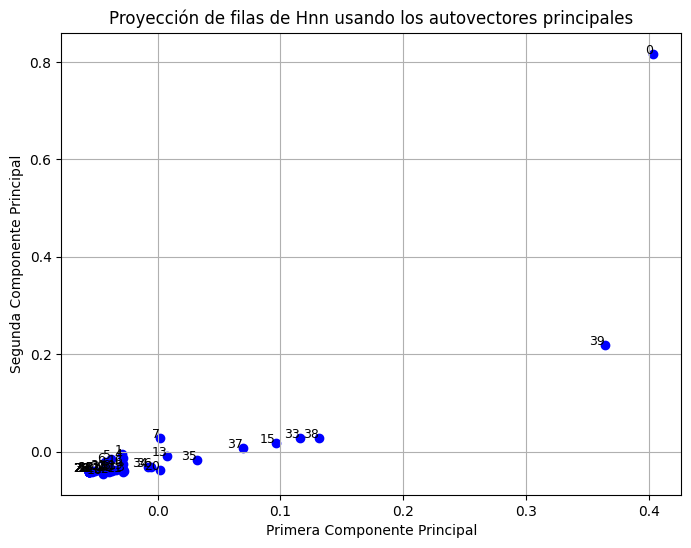

In [66]:
# Repetimos el procedimiento para Nicaragua

# Calculo Leontief de Nicaragua
Inn = np.eye(Ann.shape[0])
Lnn, Unn, Pnn = calcularLU(Inn - Ann)  # LU de Leontief Perú
LeontiefInvnn = inversaLU(Lnn, Unn, Pnn)

# Calculo input-output integrada verticalmente H
Hnn = Ann@LeontiefInvnn

# Calculo matriz de covarianza, ahora para H
HnnC = En@Hnn
C2 = (np.transpose(HnnC)@HnnC)/(40 - 1)
autovalores, autovectores = metodoPotenciaRecursivo(C2, k=2)
subespacio = np.array(autovectores).T
proyeccionNN = HnnC @ np.array(autovectores).T

GraficoProyeccion(proyeccionNN,"Hnn","blue")

justificacion

### Consigna 11 -

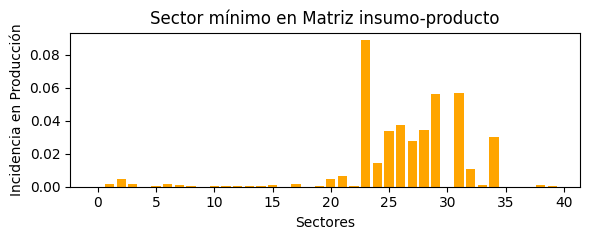

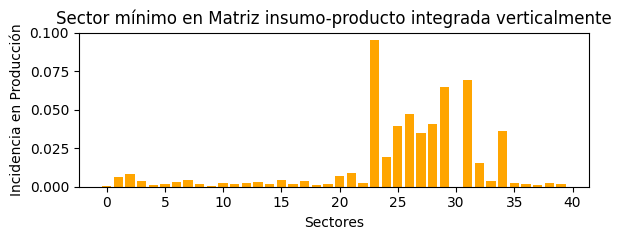

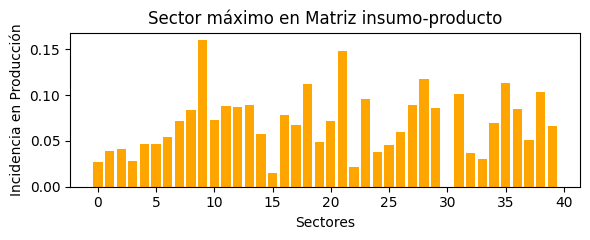

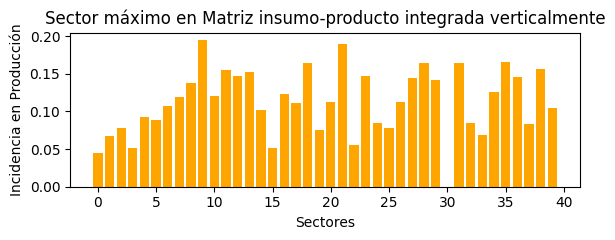

In [67]:
# from funciones import graficarFilas
Appdata = pd.read_csv("Appdata.csv")
Anndata = pd.read_csv("Anndata.csv")
App = Appdata.values
Ann = Anndata.values

# Distancia al Origen de coordenadas con la Norma de la Proyeccion
normas_proyeccion = np.zeros(proyeccion.shape[0])
for i in range(proyeccion.shape[0]):
    normas_proyeccion[i] = np.linalg.norm(proyeccion[i])

# Calculo minima y maxima distancia
MinNormaProyeccion = np.inf
MaxNormaProyeccion = 0
for i in range(proyeccion.shape[0]):
    if normas_proyeccion[i] < MinNormaProyeccion:
        MinNormaProyeccion = normas_proyeccion[i]
        IndiceDelMin = i
    if normas_proyeccion[i] > MaxNormaProyeccion:
        MaxNormaProyeccion = normas_proyeccion[i]
        IndiceDelMax = i

def GraficarFilas (Matriz, indice, titulo):
    # Crear figura y ejes
    fig, axs = plt.subplots(1, 1, figsize=(6, 2.5))
    # Graficar la diferencia en barras
    axs.bar(range(len(Matriz[indice])), Matriz[indice], color='orange')
    axs.set_title(titulo)
    axs.set_xlabel('Sectores')
    axs.set_ylabel('Incidencia en Producción')

    plt.tight_layout()
    plt.show()

TituloAppMin="Sector mínimo en Matriz insumo-producto"
TituloHppMin="Sector mínimo en Matriz insumo-producto integrada verticalmente"
TituloAppMax="Sector máximo en Matriz insumo-producto"
TituloHppMax="Sector máximo en Matriz insumo-producto integrada verticalmente"
GraficarFilas(App,IndiceDelMin,TituloAppMin)
GraficarFilas(Hpp,IndiceDelMin,TituloHppMin)
GraficarFilas(App,IndiceDelMax,TituloAppMax)
GraficarFilas(Hpp,IndiceDelMax,TituloHppMax)

Como vimos en la consigna 9, La Matriz $ A $ insumo-producto representa los insumos directos que un sector específico necesita de otros sectores para producir una unidad de su output. La Matriz integrada verticalmente $ H $ le suma todos los insumos indirectos acumulados.

A parte de que los valores necesariamente son mayores en $ H $, notamos que hay una menor diferencia entre una misma fila de $ H $ que en una misma fila de $ A $. Esto señalaria que en cada iteración de insumos (potencias de $ A $ que, como vimos anteriormente, estan incluidas en $ H $), los valores de cada columna se "mezclan" o difunden debido a las interdependencias entre sectores.

En cuanto a la comparación entre las filas, notamos que el gráfico del sector mínimo tiene varios picos, lo que indicaría que necesita insumos de otros sectores puntuales. En cambio, el sector máximo necesita insumos de toda la cadena de producción.